# Spatial plots of CWV and CAPE

From ERA-5

In [1]:
import geopy.distance
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import gridspec
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
import numpy as np
import xarray as xr
import json
import cartopy
import pandas as pd
from datetime import datetime, timedelta
import cftime
#from adjustText import adjust_text
import glob
import os

### Set region to plot and start and end time

In [2]:
lonMin, lonMax = -62.1, -9.9
latMin, latMax = -2.1, 22.1
#latMin, latMax = -10.1,30.1

start_mon = 'Aug.'
start_day = '10'
start_time = '08-'+start_day+'T00:00:00'
end_mon = 'Sep.'
end_day = '30'
end_time = '09-'+end_day+'T00:00:00'

### Plot CWV

Processing year: 1996
Processing year: 1997
Processing year: 1998
Processing year: 1999
Processing year: 2000
4
Processing year: 2001
Processing year: 2002
Processing year: 2003
Processing year: 2004
Processing year: 2005
9
Processing year: 2006
Processing year: 2007
Processing year: 2008
Processing year: 2009
Processing year: 2010
14
Processing year: 2011
Processing year: 2012
Processing year: 2013
Processing year: 2014
Processing year: 2015
19
Processing year: 2016
Processing year: 2017
Processing year: 2018
Processing year: 2019
Processing year: 2020
24
Processing year: 2021
25
Processing year: 2022
26
Processing year: 2023
27
Processing year: 2024
28
28


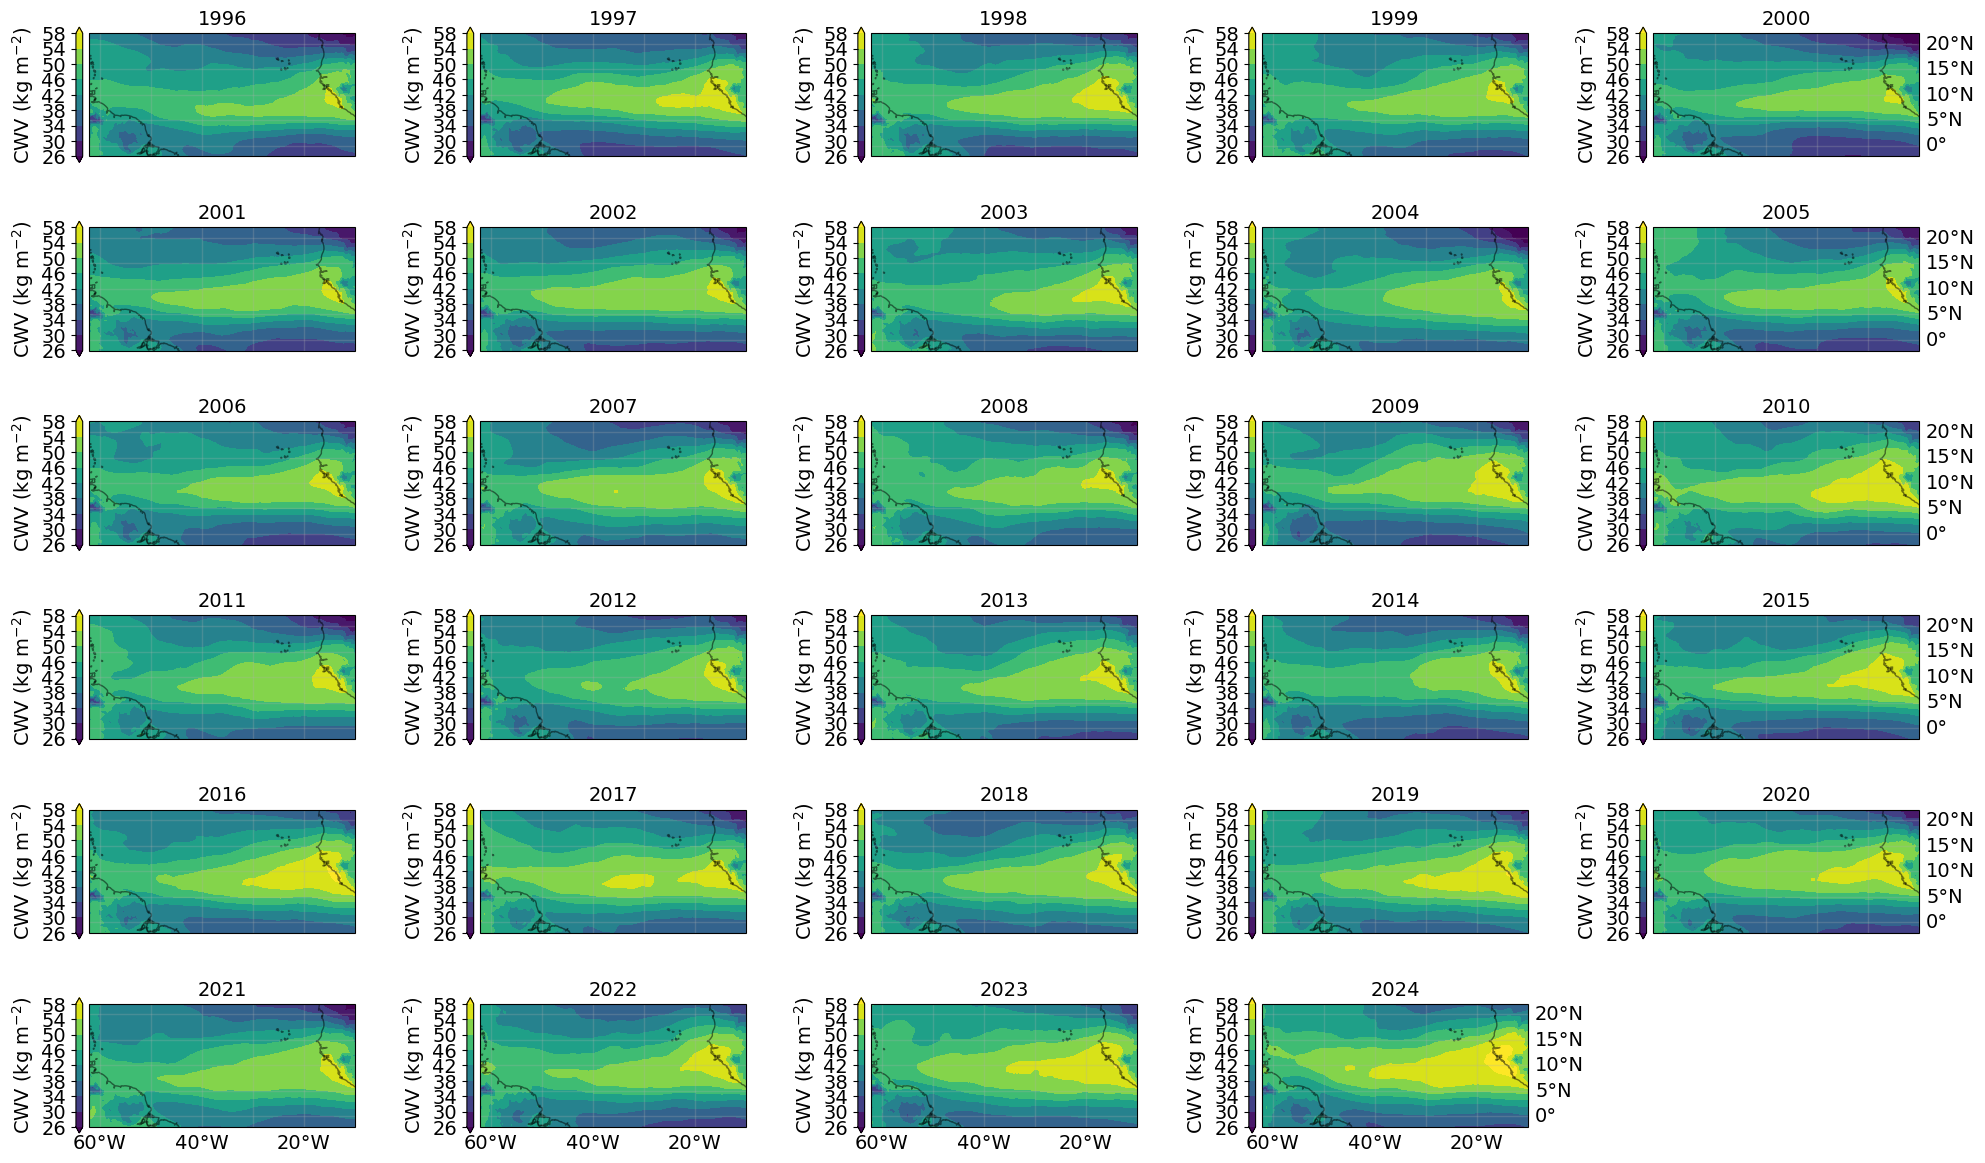

In [3]:
# For each year, spatial plot of CWV

fig = plt.figure(figsize = (20, 12))
gs = gridspec.GridSpec(6, 5, width_ratios=[1, 1, 1, 1, 1])

# Filename base for ERA-5 CWV data
filebase_CWV = "/huracan/tank4/cornell/ORCESTRA/era5/total_column_water_vapour/"

years = np.arange(1996,2025)  # 1998-2024
iyear = 0
for yy in years:
    # print year
    print("Processing year:", yy)
    
    # Load ERA-5 CWV data
    file_paths_CWV_08 = glob.glob(filebase_CWV + str(yy) + '08/' + "*.nc")
    file_paths_CWV_09 = glob.glob(filebase_CWV + str(yy) + '09/' + "*.nc")
    file_paths_CWV = file_paths_CWV_08 + file_paths_CWV_09
    era5_cwv = xr.open_mfdataset(file_paths_CWV,combine='by_coords')
    
    #Extract for time period of campaign and region
    cwv_yy = era5_cwv.sel(latitude=slice(latMax,latMin),longitude=slice(lonMin,lonMax),valid_time=slice(str(yy)+'-'+start_time,str(yy)+'-'+end_time))

    #Take mean over campaign
    cwv_yy_mean = cwv_yy.mean(dim='valid_time')
    
    # Create plot
    ax1 = fig.add_subplot(gs[iyear],projection=ccrs.PlateCarree())
    ax1.coastlines(resolution = '50m',alpha=0.5)
    #ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha = 0.25)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,alpha = 0.25)
    gl.top_labels = False
    gl.left_labels = False
    if iyear==25 or iyear==26 or iyear==27 or iyear==28:
        print(iyear)    
        gl.xlocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.xlabel_style = {'size': 14}
    else: 
        gl.bottom_labels = False
    if iyear==4 or iyear==9 or iyear==14 or iyear==19 or iyear==24 or iyear==28:
        print(iyear)
        gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20])
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 14}
    else:
        gl.right_labels = False
    
    # Plot this years CWV as filled contours
    plt.contourf(cwv_yy_mean.longitude.values, 
                 cwv_yy_mean.latitude.values,
                 cwv_yy_mean.tcwv.values,
                 cmap = 'viridis',levels = np.arange(26, 60, 4),extend='both')

    cbar=plt.colorbar(location='left',orientation='vertical',shrink = 0.75, pad=0.02)
    cbar.set_label('CWV (kg m$^{-2}$)',fontsize=14)
    cbar.set_ticks(np.arange(26, 60, 4))
    cbar.set_ticklabels([f'{x:.0f}' for x in np.arange(26, 60, 4)],fontsize=14)

    # Set the plot limits and title
    ax1.set_title(str(yy),size=14)
    ax1.set_xlim(lonMin, lonMax)
    ax1.set_ylim(latMin, latMax)
    
    era5_cwv.close()
    cwv_yy.close()
    iyear=iyear+1
    
sns.set_context('paper') 
plt.tight_layout()  # Adjust subplots to fit into figure area.

In [4]:
era5_cwv

<xarray.Dataset> Size: 1GB
Dimensions:     (valid_time: 1008, latitude: 241, longitude: 1440)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 8kB 2024-08-15 ... 2024-09-25T23:...
  * latitude    (latitude) float64 2kB 30.0 29.75 29.5 ... -29.5 -29.75 -30.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    expver      (valid_time) <U4 16kB dask.array<chunksize=(24,), meta=np.ndarray>
Data variables:
    tcwv        (valid_time, latitude, longitude) float32 1GB dask.array<chunksize=(12, 121, 720), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-21T20:23 GRIB to CDM+CF via cfgrib-0.9.1...

Processing year: 1996


Processing year: 1997
Processing year: 1998
Processing year: 1999
Processing year: 2000
4
Processing year: 2001
Processing year: 2002
Processing year: 2003
Processing year: 2004
Processing year: 2005
9
Processing year: 2006
Processing year: 2007
Processing year: 2008
Processing year: 2009
Processing year: 2010
14
Processing year: 2011
Processing year: 2012
Processing year: 2013
Processing year: 2014
Processing year: 2015
19
Processing year: 2016
Processing year: 2017
Processing year: 2018
Processing year: 2019
Processing year: 2020
24
Processing year: 2021
25
Processing year: 2022
26
Processing year: 2023
27
Processing year: 2024
28
28


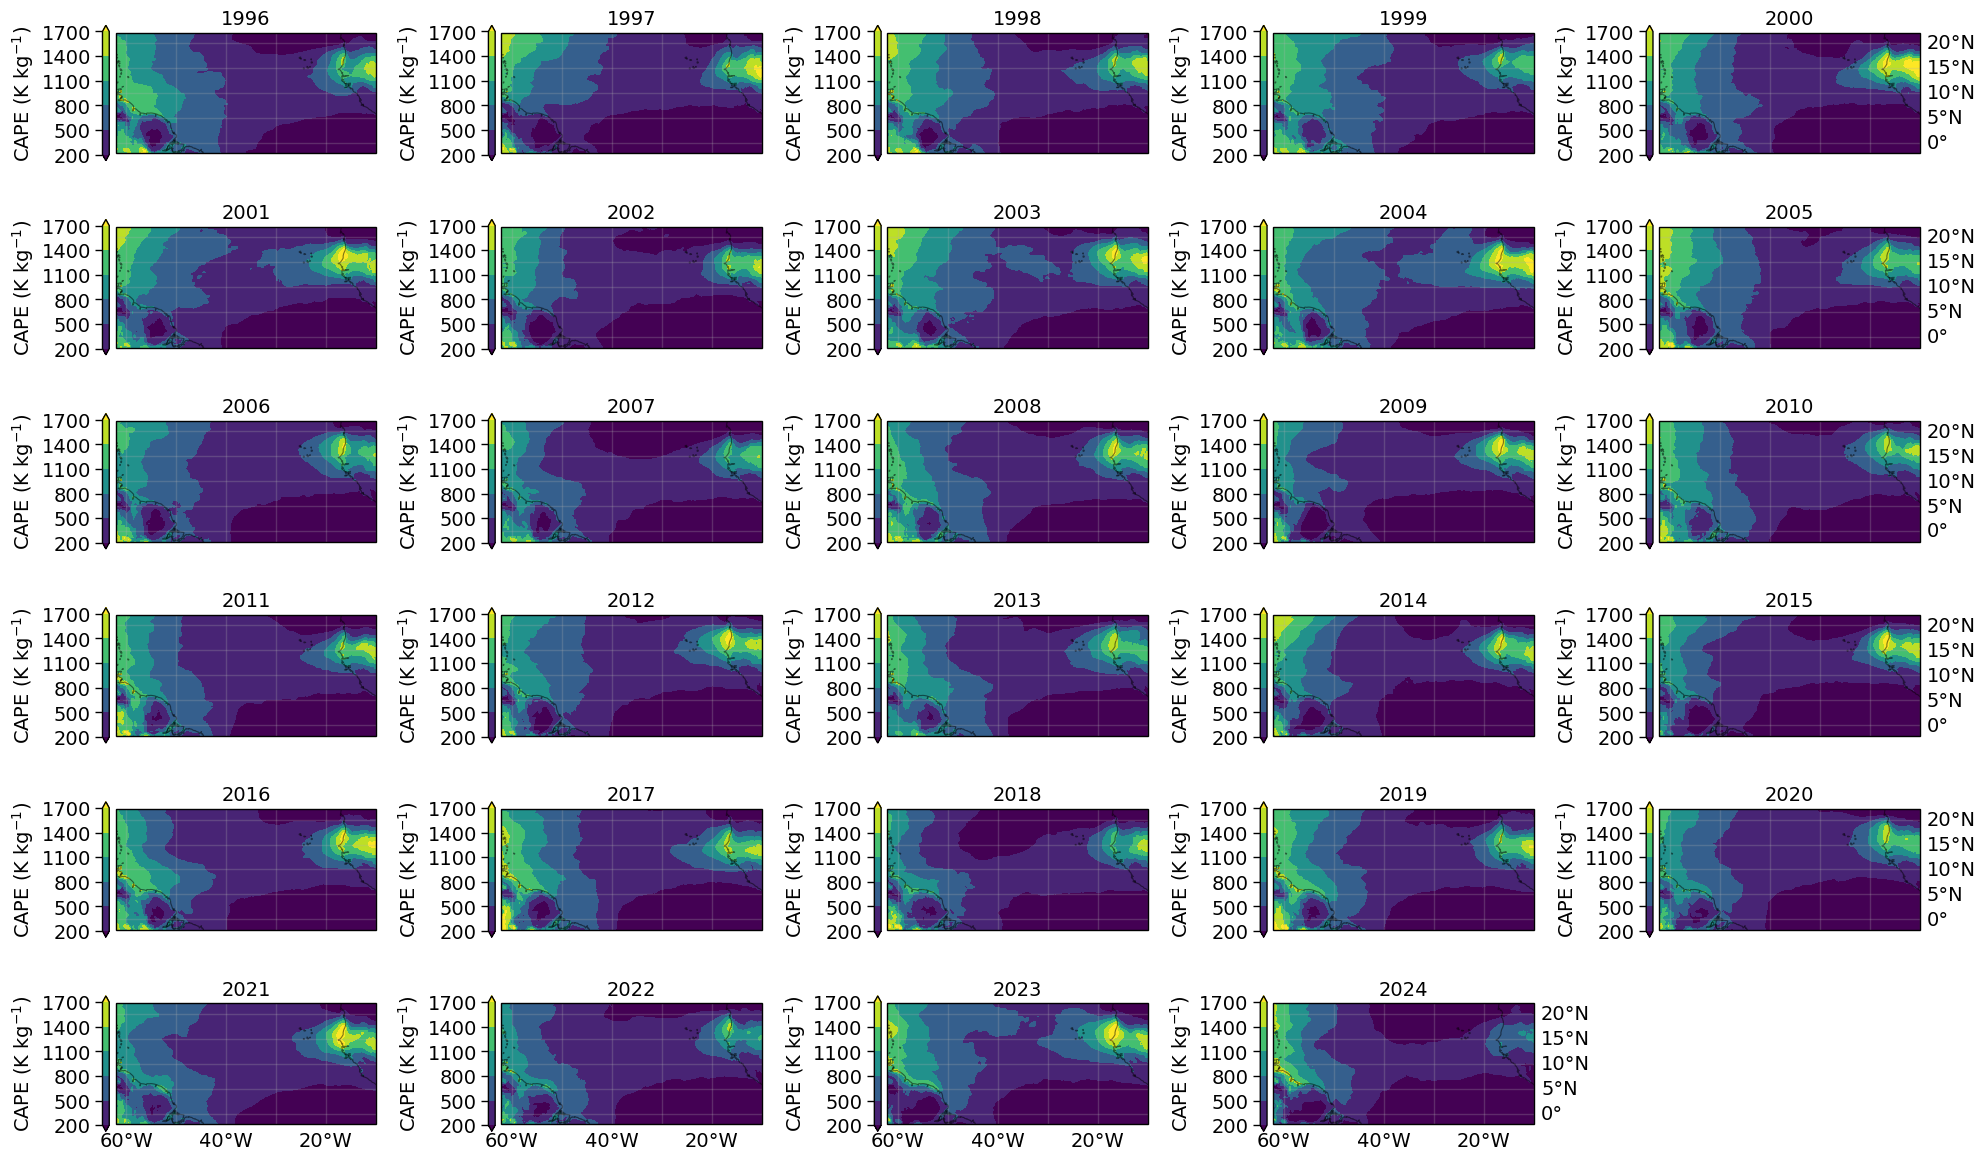

In [5]:
# For each year, spatial plot of CAPE

fig = plt.figure(figsize = (20, 12))
gs = gridspec.GridSpec(6, 5, width_ratios=[1, 1, 1, 1, 1])

# Filename base for ERA-5 CAPE data
filebase_CAPE = "/huracan/tank4/cornell/ORCESTRA/era5/convective_available_potential_energy/"

years = np.arange(1996,2025)  # 1998-2024
iyear = 0
for yy in years:
    # print year
    print("Processing year:", yy)
    
    # Load ERA-5 CAPE data
    file_paths_CAPE_08 = glob.glob(filebase_CAPE + str(yy) + '08/' + "*.nc")
    file_paths_CAPE_09 = glob.glob(filebase_CAPE + str(yy) + '09/' + "*.nc")
    file_paths_CAPE = file_paths_CAPE_08 + file_paths_CAPE_09
    era5_cape = xr.open_mfdataset(file_paths_CAPE,combine='by_coords')

    #Extract for time period of campaign and region
    cape_yy = era5_cape.sel(latitude=slice(latMax,latMin),longitude=slice(lonMin,lonMax),valid_time=slice(str(yy)+'-'+start_time,str(yy)+'-'+end_time))

    #Take mean over campaign
    cape_yy_mean = cape_yy.mean(dim='valid_time')

    # Create plot
    ax1 = fig.add_subplot(gs[iyear],projection=ccrs.PlateCarree())
    ax1.coastlines(resolution = '50m',alpha=0.5)
    #ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha = 0.25)
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,alpha = 0.25)
    gl.top_labels = False
    gl.left_labels = False
    if iyear==25 or iyear==26 or iyear==27 or iyear==28:
        print(iyear)    
        gl.xlocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.xlabel_style = {'size': 14}
    else: 
        gl.bottom_labels = False
    if iyear==4 or iyear==9 or iyear==14 or iyear==19 or iyear==24 or iyear==28:
        print(iyear)
        gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20])
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 14}
    else:
        gl.right_labels = False

    # Plot this years CAPE as filled contours
    plt.contourf(cape_yy_mean.longitude.values, 
                 cape_yy_mean.latitude.values,
                 cape_yy_mean.cape.values,
                 cmap = 'viridis',levels=np.arange(200,2000,300),extend='both')

    cbar=plt.colorbar(location='left',orientation='vertical',shrink = 0.75, pad=0.02)
    cbar.set_label('CAPE (K kg$^{-1}$)',fontsize=14)
    cbar.set_ticks(np.arange(200, 2000, 300))
    cbar.set_ticklabels([f'{x:.0f}' for x in np.arange(200, 2000, 300)],fontsize=14)

    # Set the plot limits and title
    ax1.set_title(str(yy),size=14)
    ax1.set_xlim(lonMin, lonMax)
    ax1.set_ylim(latMin, latMax)

    era5_cape.close()
    cape_yy.close()
    iyear=iyear+1
    
sns.set_context('paper') 
plt.tight_layout()  # Adjust subplots to fit into figure area.